In [2]:
import pandas as pd

In [15]:
# Read datasets

df_bookings = pd.read_csv("datasets/f_bookings.csv")
df_date = pd.read_csv("datasets/d_date.csv")
df_hotels = pd.read_csv("datasets/d_hotels.csv")
df_rooms = pd.read_csv("datasets/d_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/f_agg_bookings.csv")

### Explore aggregate bookings

In [ ]:
df_bookings.head(4)

In [8]:
df_bookings.shape

(134590, 12)

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<Axes: xlabel='booking_platform'>

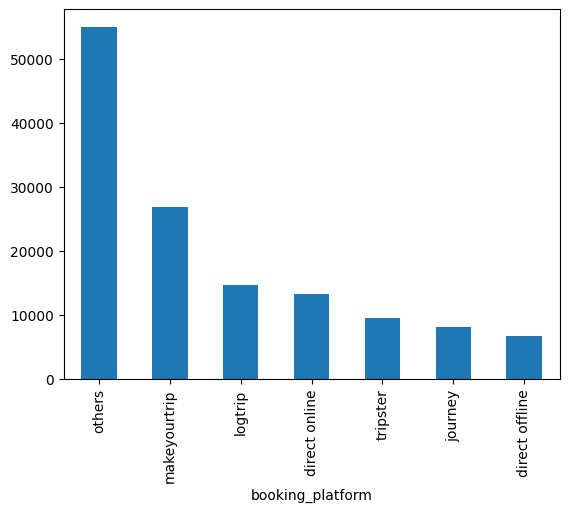

In [17]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [34]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [20]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [28]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [38]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [46]:
df_agg_bookings[df_agg_bookings['capacity'] == df_agg_bookings['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


### Data Cleaning

In [38]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Clean invalid quests**

In [16]:
df_bookings = df_bookings[df_bookings.no_guests > 0]

In [17]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Outlier removal in revenue generated**

In [18]:
higher_limit = df_bookings.revenue_generated.mean() + 3*df_bookings.revenue_generated.std()
higher_limit

np.float64(294498.50173207896)

In [19]:
lower_limit = df_bookings.revenue_generated.mean() - 3*df_bookings.revenue_generated.std()
lower_limit
df_bookings.shape

(134578, 12)

In [20]:
df_bookings[df_bookings.revenue_generated <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [21]:
df_bookings = df_bookings[df_bookings.revenue_generated <= higher_limit]
df_bookings.shape

(134573, 12)

In [22]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [25]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33479.358661845814)

In [24]:
df_bookings[df_bookings.revenue_realized < 0]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [28]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [29]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [30]:
# mean + 3*standard deviation
23439+3*9048

50583

In [ ]:
# 50583 is higher than 45220 so its reasonable that there are no outliers now

**Replace null values in aggregate bookings with mean()**

In [45]:
#df_agg_bookings[df_agg_bookings.isnull().any(axis=1)]
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [46]:
df_agg_bookings.fillna(df_agg_bookings.capacity.mean(), inplace=True)

In [55]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
occ_pct                0
dtype: int64

In [51]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

In [52]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda x: x['successful_bookings']/x['capacity'], axis=1)

In [53]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))

In [54]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [32]:
#There are various types of data transformations

#Creating new columns
#Normalization
#Merging data
#Aggregation

### Insights Generation

**Average occupancy rate in each of the room categories**

In [38]:
df_agg_bookings.value_counts()

property_id  check_in_date  room_category  successful_bookings  capacity
19563        9-May-22       RT4            3                    6.0         1
16558        1-Jul-22       RT1            11                   19.0        1
                            RT2            13                   22.0        1
                            RT3            5                    8.0         1
                            RT4            2                    3.0         1
                                                                           ..
             10-Jun-22      RT3            6                    8.0         1
                            RT2            16                   22.0        1
                            RT1            11                   19.0        1
             10-Jul-22      RT4            3                    3.0         1
                            RT3            8                    8.0         1
Name: count, Length: 9198, dtype: int64

In [67]:
df_rooms.value_counts()

room_id  room_class  
RT1      Standard        1
RT2      Elite           1
RT3      Premium         1
RT4      Presidential    1
Name: count, dtype: int64

In [89]:
df_merged = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df_merged.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [77]:
df_merged.drop("room_id", axis=1, inplace=True)
df_merged.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [78]:
df_merged.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.888985
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [79]:
print(df_merged[df_merged.room_class == "Standard"].occ_pct.mean())

57.88898519163762


**Average occupancy rate per city**

In [80]:
df_hotels.value_counts()

property_id  property_name  category  city     
16558        Atliq Grands   Luxury    Delhi        1
16559        Atliq Exotica  Luxury    Mumbai       1
16560        Atliq City     Business  Delhi        1
16561        Atliq Blu      Luxury    Delhi        1
16562        Atliq Bay      Luxury    Delhi        1
16563        Atliq Palace   Business  Delhi        1
17558        Atliq Grands   Luxury    Mumbai       1
17559        Atliq Exotica  Luxury    Mumbai       1
17560        Atliq City     Business  Mumbai       1
17561        Atliq Blu      Luxury    Mumbai       1
17562        Atliq Bay      Luxury    Mumbai       1
17563        Atliq Palace   Business  Mumbai       1
17564        Atliq Seasons  Business  Mumbai       1
18558        Atliq Grands   Luxury    Hyderabad    1
18559        Atliq Exotica  Luxury    Hyderabad    1
18560        Atliq City     Business  Hyderabad    1
18561        Atliq Blu      Luxury    Hyderabad    1
18562        Atliq Bay      Luxury    Hyderabad    

In [90]:
df_merged = pd.merge(df_merged, df_hotels, on="property_id")
df_merged.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard,Atliq Grands,Luxury,Delhi


In [82]:
df_merged.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.908668
Name: occ_pct, dtype: float64

**When was occupancy better? Weekday or Weekend?**

In [86]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [91]:
df_merged = pd.merge(df_merged, df_date, left_on="check_in_date", right_on="date")

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday


In [92]:
df_merged.groupby("day_type")["occ_pct"].mean().round()